In [1]:
import torch_struct
import torch
import matplotlib.pyplot as plt

In [16]:
vals = torch.zeros(1, 10,10)
vals[0, :5, :5] = torch.rand(5) 
vals[0, 5:, 5:] = torch.rand(5) 
vals = vals.exp()

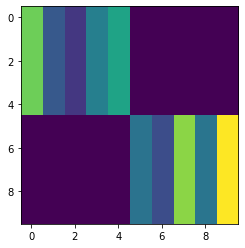

In [17]:
plt.imshow(vals[0])

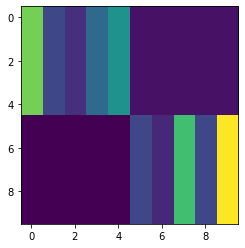

In [18]:
plt.imshow(vals.softmax(-1)[0])

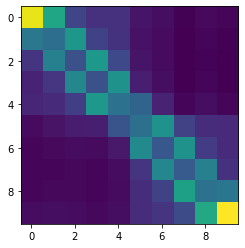

In [19]:
plt.imshow(torch_struct.deptree(vals).detach()[0])

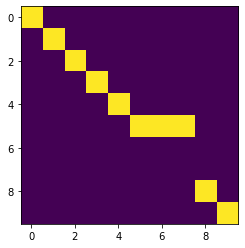

In [20]:
plt.imshow(torch_struct.deptree(vals, torch_struct.MaxSemiring).detach()[0])

torch.Size([1, 10, 10])

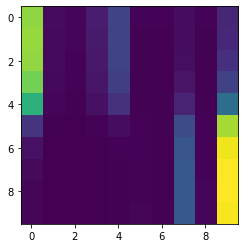

In [55]:
q = torch.zeros(1, 10, 10, 10)
q[:, :, :, :] = vals.unsqueeze(-1)
q[:, :, :, :] += torch.eye(10, 10).view(1, 1, 10, 10) * 5 
plt.imshow(torch.stack(torch_struct.linearchain(q)).detach()[1:, 0])

In [57]:
q = torch.zeros(1, 10, 3, 10, 10)
q[:, :, 1,  :, :] = vals.unsqueeze(-1)
q[:, :, 2,  :, :] = vals.unsqueeze(-1)

plt.imshow(torch.stack(torch_struct.semimarkov(q)).detach()[1:, 0])

AttributeError: 'tuple' object has no attribute 'sum'